In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import classification_report

# %matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 30)

# 데이터분석 스케치

## [Horse colic](https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+)

+ team 
  + 권순호, 윤지원, 김원정
  

+ index
	* EDA(Exploratory data analysis)
	* Feature selection
	* Modeling
	* Model selection

## EDA
+ 변수 탐색 및 분류
  + 변수 이름과 설명
  + 상관관계가 없는 변수는 어떤것이 있나?
  + 의미없는값, 전처리가 필요한 값들을 선별및 가공하자

In [3]:
df = pd.read_csv('./horse.csv')
df['outcome'] = df.pop('outcome')

In [4]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,no,11300,0,0,no,died
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,no,2208,0,0,no,euthanized
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,no,0,0,0,yes,lived
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,yes,2208,0,0,yes,died
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,no,4300,0,0,no,died


In [5]:
null_count = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
null_count['percentage'] = null_count/len(df)

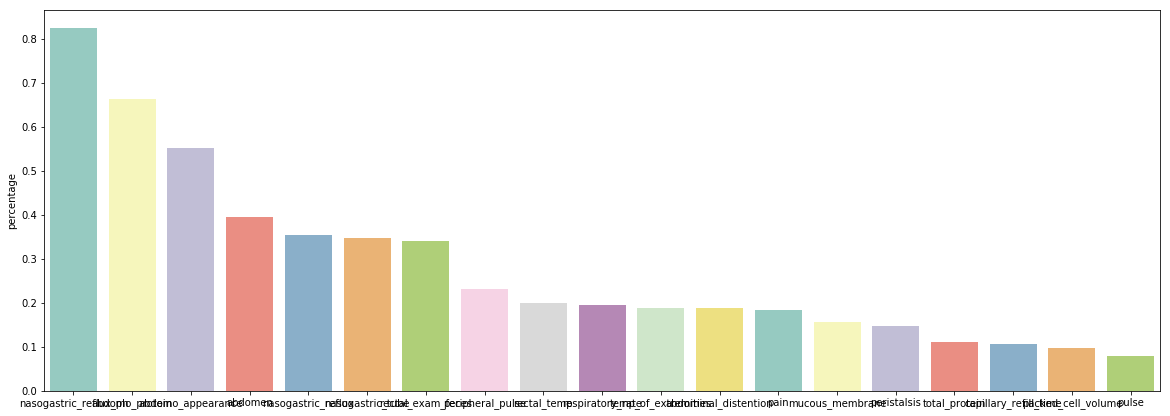

In [6]:
plt.figure(figsize=(20, 7))
sns.barplot(x=null_count.head(19).index, y='percentage', data=null_count.head(19), palette="Set3")
plt.show()

In [7]:
cate = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 
       'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']
numeric = ['rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 
           'total_protein', 'abdomo_protein']

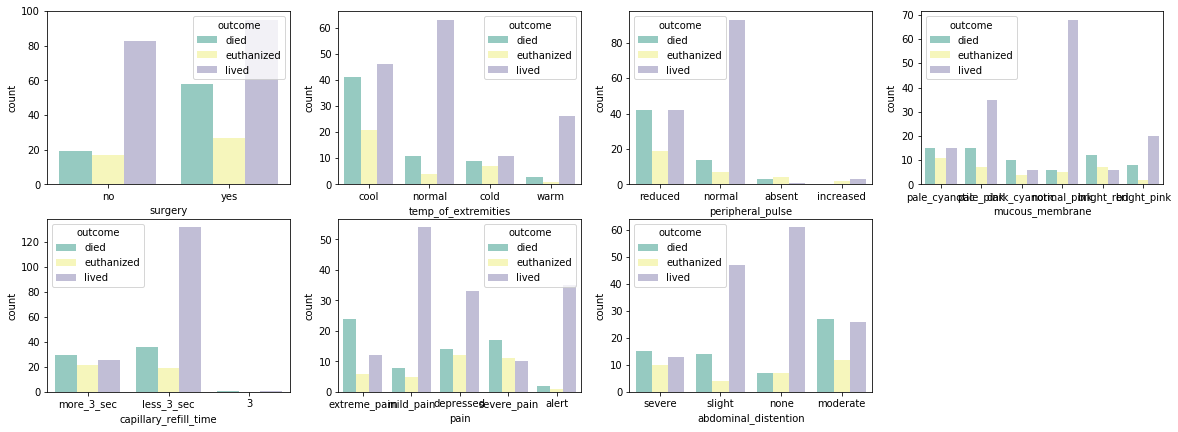

In [8]:
cate3 = ['surgery', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
        'capillary_refill_time', 'pain', 'abdominal_distention']

plt.figure(figsize=(20, 7))
for i, feature in enumerate(cate3):
    plt.subplot(2,4,i+1)
    sns.countplot(feature, hue='outcome', data=df, palette="Set3")
plt.show()

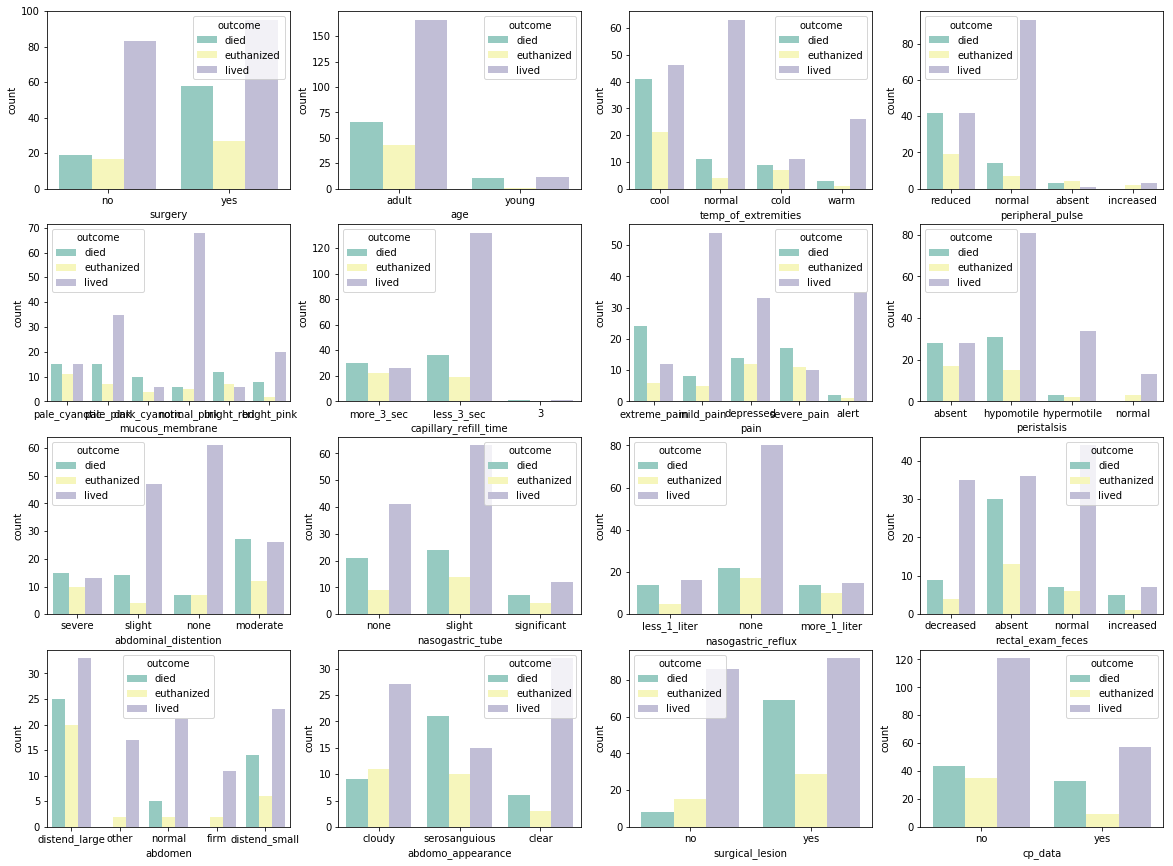

In [9]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(cate):
    plt.subplot(4,4,i+1)
    sns.countplot(feature, hue='outcome', data=df, palette="Set3")
plt.show()

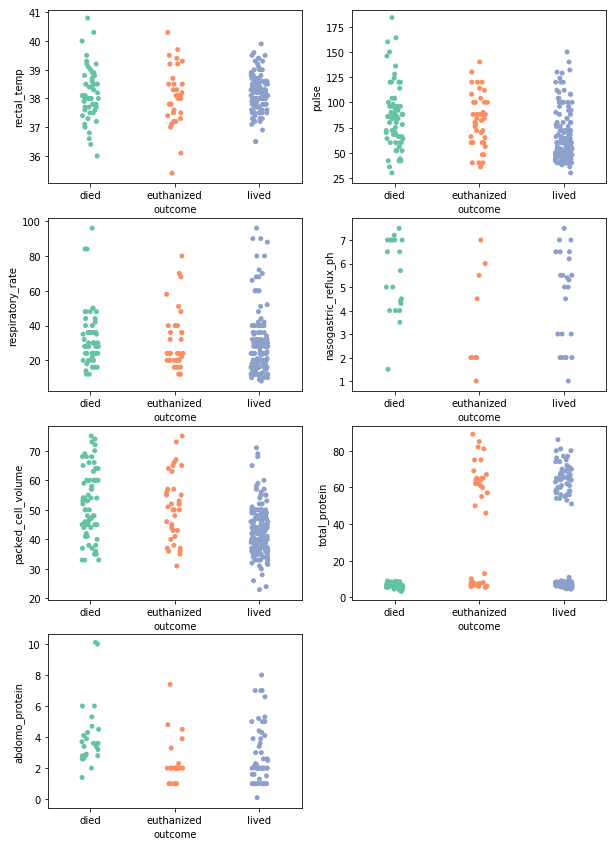

In [10]:
plt.figure(figsize=(10, 30))
for i, feature in enumerate(numeric):
    plt.subplot(8,2,i+1)
    sns.stripplot("outcome", feature, data=df, jitter=True, palette="Set2")
plt.show()

### 변수 이름과 설명 :

In [11]:
def cat_plot(feature, df=df, outcome='outcome', size=(10,3), palette='Set3'):
    plt.figure(figsize=size)
    plt.subplot(1,3,1)
    sns.countplot(x=feature, data=df, palette="Set3")
    plt.subplot(1,3,2)
    sns.countplot(outcome, hue=feature, data=df, palette="Set3")
    plt.subplot(1,3,3)
    sns.countplot(feature, hue=outcome, data=df, palette="Set3")
    plt.show()
    return None

In [12]:
def missing_per(feature):
    percentage = df[feature].isnull().sum() / len(df[feature]) * 100
    return percentage

surgery?(수술 경험)
  - 1 = Yes, it had surgery
  - 2 = No, It was treated without surgery

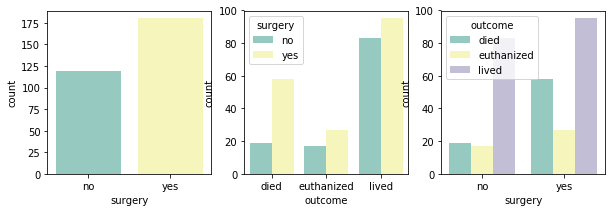

In [13]:
cat_plot("surgery")

Age(나이)
- 1 = 성인 말
- 2 = 어린 말 (< 6개월)

In [14]:
df['age'].value_counts()

adult    275
young     24
Name: age, dtype: int64

In [15]:
275/299

0.919732441471572

In [16]:
24/299

0.0802675585284281

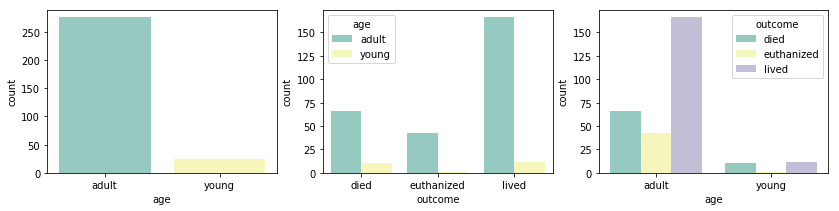

In [17]:
cat_plot("age", size=(14, 3))

Hospital Number(병원 번호)
 - 숫자 ID
 - 말에 지정된 case number
      (만약 말을 1회 이상 치료한다면 특별하지 않을 수 있다.)

rectal temperature(직장 온도)
 - linear
 - in degrees celsius.
 - 감염으로 인해 고온이 발생할 수 있습니다.
 - 동물이 late shock을 받으면 온도가 낮아질 수 있다.
 - 정상 온도는 37.8
 - 이 매개 변수는 일반적으로 문제가 진행됨에 따라 변경됩니다. (예를 들어, 말이 충격에 빠질 때 정상 범위를 통과하면서 병변 때문에 상승할 수 있습니다.)
       

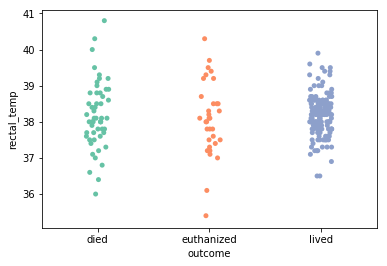

In [18]:
sns.stripplot("outcome", "rectal_temp", data=df, jitter=True, palette='Set2')
plt.show()

pulse(맥박)
 - linear
 - 분당 심장 박동 수
 - is a reflection of the heart condition: 30-40은 성인에게 정상입니다.
 - 경주용 말이지만 일반 말보다 심장박동수가 낮다(분당 20-25정도)
 - 통증이있는 병변이 있거나 순환계 충격을 겪은 동물은 심박수가 상승 할 수 있습니다

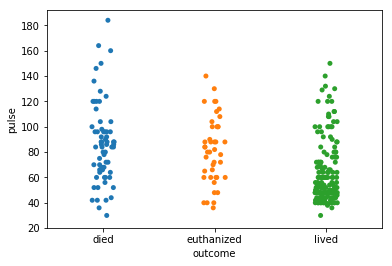

In [19]:
sns.stripplot("outcome", "pulse", data=df, jitter=True)
plt.show()

respiratory rate(호흡 속도)
 - linear
 - normal rate is 8 to 10
 - 심한 변동 때문에 유용성이 의심스럽습니다.

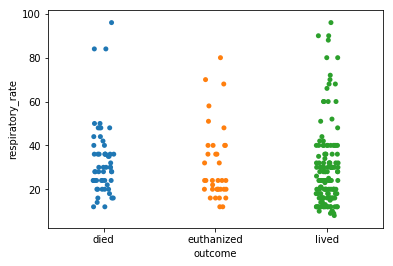

In [20]:
sns.stripplot("outcome", "respiratory_rate", data=df, jitter=True)
plt.show()

temperature of extremities(팔 다리의 온도)
 - 말초 혈액 순환의 주관적 표시
 - possible values:
   - 1 = Normal
   - 2 = Warm
   - 3 = Cool
   - 4 = Cold
 - cool와 cold는 쇼크의 가능성을 보여줍니다.
 - 고열 사지는 직장 온도 상승과 관련이 있습니다.

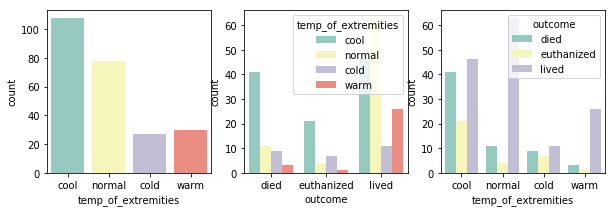

In [21]:
cat_plot("temp_of_extremities")

peripheral pulse(말초 맥박)
 - subjective
 - possible values are:
   - 1 = normal
   - 2 = increased
   - 3 = reduced
   - 4 = absent
 - normal or increased p.p.는 적절한 순환을 나타내며 reduced or absent는 나쁜 perfusion을 나타냅니다.

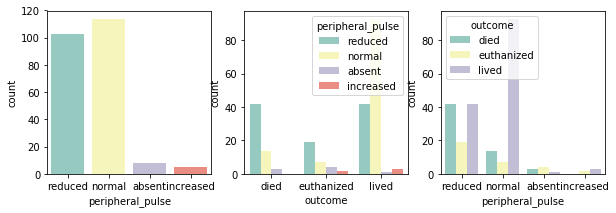

In [22]:
cat_plot("peripheral_pulse")

mucous membranes(점막)
 - 주관적인 색의 측정
 - possible values are:
   - 1 = normal pink
   - 2 = bright pink
   - 3 = pale pink
   - 4 = pale cyanotic
   - 5 = bright red / injected
   - 6 = dark cyanotic
 - 1, 2는 정상 또는 약간 증가 된 혈액 순환을 나타냅니다
 - 3 는 early shock 발생일수도 있습니다.
 - 4,6 은 심각한 순환 기관의 손상을 나타낸다.
 - 5는 패혈증을 더 많이 나타낸다.

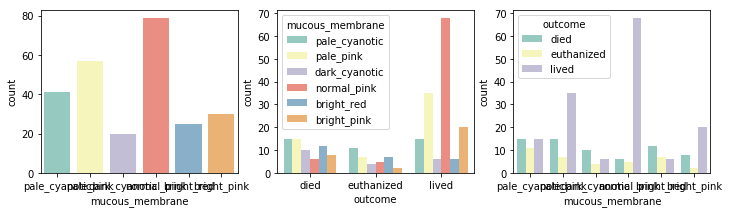

In [23]:
cat_plot("mucous_membrane", size=(12, 3))

capillary refill time(모세관 주입 시간)
  - 임상 적 판단. 리필 시간이 길수록 혈액 순환이 원활하지 않음.
  - possible values
    - 1 = < 3 seconds
    - 2 = >= 3 seconds

In [24]:
df['capillary_refill_time'].replace({'3': 'more_3_sec'}, inplace=True)

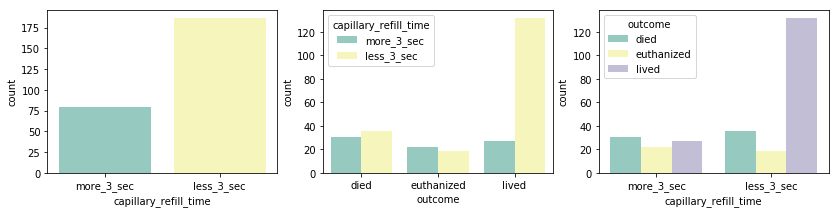

In [25]:
cat_plot("capillary_refill_time", size=(14, 3))

pain 
  - 말의 통증 수준에 대한 주관적인 판단
  - possible values:
    - 1 = alert, no pain
    - 2 = depressed
    - 3 = intermittent mild pain
    - 4 = intermittent severe pain
    - 5 = continuous severe pain
  - should NOT be treated as a ordered or discrete variable!
  - 일반적으로 통증이 심할수록 수술이 필요할 가능성이 높습니다.
  - 통증을 미리 치료하면 통증 수준을 어느 정도 가릴 수 있습니다.

In [26]:
missing_per('pain')

18.394648829431436

In [27]:
df['pain'].value_counts()

mild_pain       67
depressed       59
extreme_pain    42
alert           38
severe_pain     38
Name: pain, dtype: int64

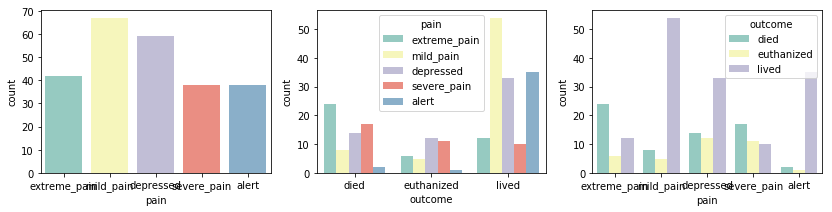

In [28]:
cat_plot("pain", size=(14,3))

peristalsis(연동운동)                        
  - 말의 장내 활동의 표시. 내장이 점점 팽창하거나 말이 더 독성이 생기면서 활동은 감소한다.
  - possible values:
    - 1 = hypermotile
    - 2 = normal
    - 3 = hypomotile
    - 4 = absent

In [29]:
missing_per('peristalsis')

14.715719063545151

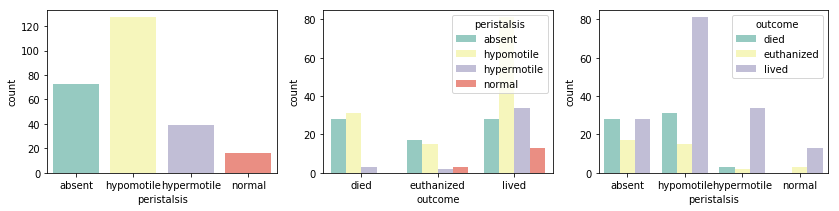

In [30]:
cat_plot("peristalsis", size=(14, 3))

abdominal distension(복부 팽창)
  -  An IMPORTANT parameter.
  - possible values
    - 1 = none
    - 2 = slight
    - 3 = moderate
    - 4 = severe
  - 복부 팽만감을 가진 동물은 고통스럽고 내장 운동성을 감소시킬 수 있습니다.
  - 복부 팽창이 심한 말은 단지 압력을 완화시키기 위해 수술이 필요할 것이다.

In [31]:
missing_per('abdominal_distention')

18.729096989966553

In [32]:
df['abdominal_distention'].value_counts()

none        75
slight      65
moderate    65
severe      38
Name: abdominal_distention, dtype: int64

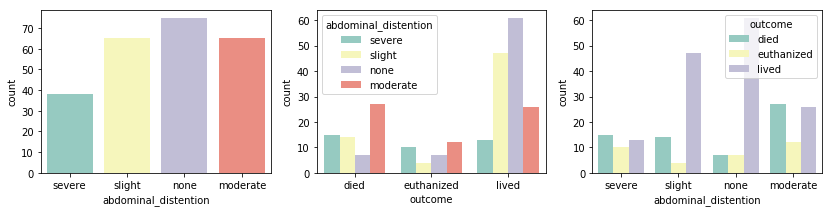

In [33]:
cat_plot("abdominal_distention", size=(14,3))

nasogastric tube(비위 관)
  - 이것은 튜브에서 나오는 가스를 의미합니다.
  - possible values:
    - 1 = none
    - 2 = slight
    - 3 = significant
  - 위에 있는 큰 가스 캡은 말을 불편하게 할 수 있다.

In [34]:
missing_per('nasogastric_tube')

34.782608695652172

In [35]:
df['nasogastric_tube'].value_counts()

slight         101
none            71
significant     23
Name: nasogastric_tube, dtype: int64

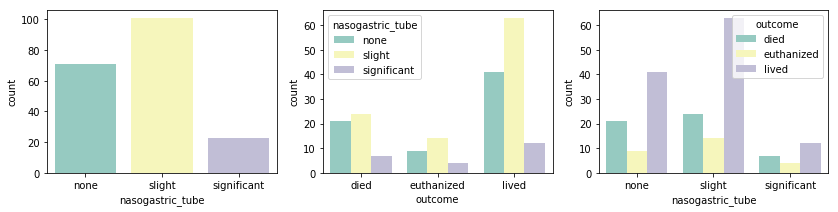

In [36]:
cat_plot("nasogastric_tube", size = (14, 3))

nasogastric reflux(비위 역류)
  - possible values
    - 1 = none
    - 2 = > 1 liter
    - 3 = < 1 liter
  - 역류 량이 많을수록 장의 나머지 부분으로부터의 유체 통로에 심각한 장애물이있을 확률이 높습니다

In [37]:
missing_per('nasogastric_reflux')

35.451505016722408

In [38]:
df['nasogastric_reflux'].value_counts()

none            119
more_1_liter     39
less_1_liter     35
Name: nasogastric_reflux, dtype: int64

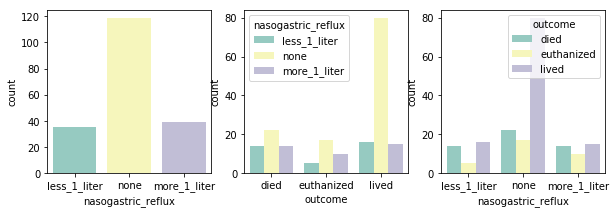

In [39]:
cat_plot("nasogastric_reflux")

nasogastric reflux PH(비위 관성 환류 PH)
  - linear
  - scale is from 0 to 14 with 7 being neutral
  - 정상 값은 3에서 4 범위에 있습니다.

drop시키는게 좋을듯

In [40]:
missing_per('nasogastric_reflux_ph')

82.274247491638803

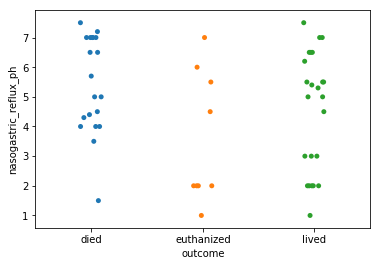

In [41]:
sns.stripplot("outcome", "nasogastric_reflux_ph", data=df, jitter=True)
plt.show()

rectal examination - feces(직장 검사 - 대변)
  - possible values
    - 1 = normal
    - 2 = increased
    - 3 = decreased
    - 4 = absent
  - 배설물이 없다는 것은 아마도 장애를 나타냅니다.

In [42]:
missing_per('rectal_exam_feces')

34.113712374581937

In [43]:
df['rectal_exam_feces'].value_counts()

absent       79
normal       57
decreased    48
increased    13
Name: rectal_exam_feces, dtype: int64

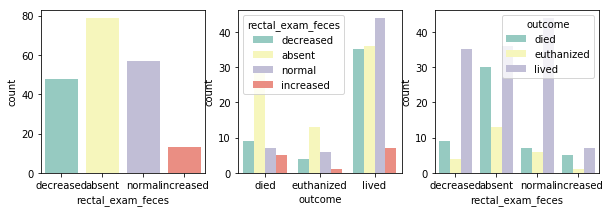

In [44]:
cat_plot("rectal_exam_feces")

abdomen(복부)
  - possible values
    - 1 = normal
    - 2 = other
    - 3 = firm feces in the large intestine
    - 4 = distended small intestine
    - 5 = distended large intestine
  - 3은 아마도 기계적인 충격에 의해 야기된 방해물일 것이다, 그리고 보통 의학적으로 치료된다.
  - 4 및 5는 수술 병변을 나타낸다

In [45]:
df['abdomen'].value_counts()

distend_large    78
distend_small    43
normal           28
other            19
firm             13
Name: abdomen, dtype: int64

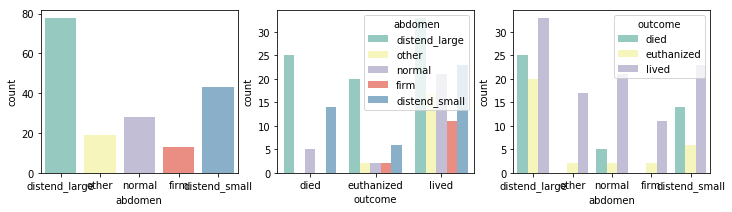

In [46]:
cat_plot("abdomen", size=(12, 3))

packed cell volume
- linear
- 혈액 속의 적혈구의 수
- 정상 범위는 30 ~ 50입니다. 혈액 순환이 원활 해지거나 동물이 탈수됨에 따라 혈중 농도가 상승합니다.

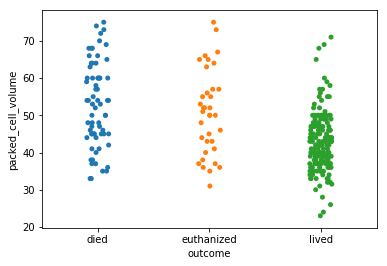

In [47]:
sns.stripplot("outcome", "packed_cell_volume", data=df, jitter=True)
plt.show()

total protein(총 단백질)
  - linear
  - 정상적인 값은 6-7.5 (gms / dL) 범위입니다
  - 값이 높을수록 탈수량이 커집니다.

In [48]:
missing_per('total_protein')

11.036789297658862

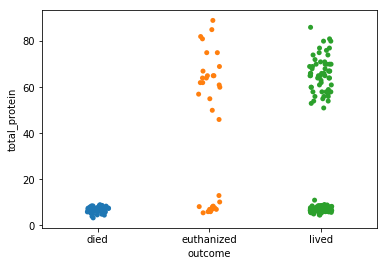

In [49]:
sns.stripplot("outcome", "total_protein", data=df, jitter=True)
plt.show()

abdominocentesis appearance(복강경 외관)
  - 말의 복부에 바늘을 넣고 복강으로부터 유체를 얻는다.
  - possible values:
    - 1 = clear
    - 2 = cloudy
    - 3 = serosanguinous
  - normal fluid is clear while cloudy or serosanguinous indicates a compromised gut

In [50]:
missing_per('abdomo_appearance')

55.18394648829431

In [51]:
df['abdomo_appearance'].value_counts()

cloudy           47
serosanguious    46
clear            41
Name: abdomo_appearance, dtype: int64

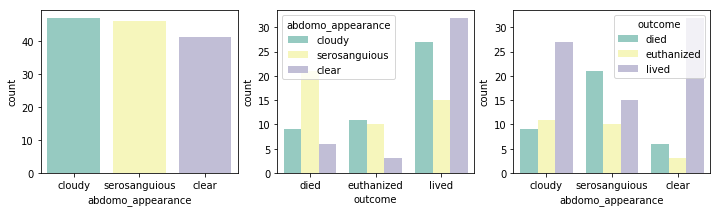

In [52]:
cat_plot("abdomo_appearance", size=(12, 3))

abdomcentesis total protein(복강 내 총 단백질)
  - linear
  - 단백질 수준이 높을수록 손상된 창자가 더 많을 것입니다. 값은 gms / dL 단위입니다.

drop 시키는거 고려

In [53]:
missing_per('abdomo_protein')

66.220735785953181

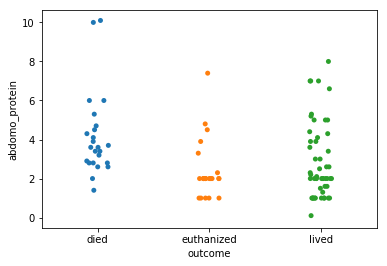

In [54]:
sns.stripplot("outcome", "abdomo_protein", data=df, jitter=True)
plt.show()

surgical lesion? (외과 적 병변)
  - retrospectively, was the problem (lesion) surgical?
  -  colic의 원인을 찾으려면 일단 배를 갈라봐야 알수 있기 때문에 수술하는과정에서 알아내거나(Yes) 부검해서 알아낸다(no).
  - possible values:
    - 1 = Yes
    - 2 = No

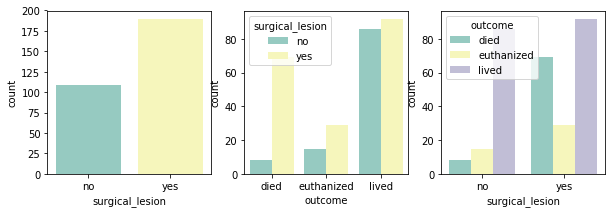

In [55]:
cat_plot("surgical_lesion")

25, 26, 27: type of lesion
- 첫 번째 숫자는 병변의 위치입니다.
  - 1 = gastric (위(胃)의)
  - 2 = sm intestine (sm 창자)
  - 3 = lg colon (결장)
  - 4 = lg colon and cecum (결장과 맹장)
  - 5 = cecum (맹장)
  - 6 = transverse colon (횡행결장)
  - 7 = retum/descending colon (/하행 결장)
  - 8 = uterus (자궁)
  - 9 = bladder (방광)
  - 11 = all intestinal sites (모든 창자 부위)
  - 00 = none (없음)
  
  
- 두 번째 숫자는 유형입니다.
  - 1 = simple (단순한)
  - 2 = strangulation (교살)
  - 3 = inflammation (염증)
  - 4 = other
  
  
- 세 번째 숫자는 하위 유형입니다.
  - 1 = mechanical
  - 2 = paralytic
  - 0 = n/a
  
  
- 네 번째 숫자는 특정 코드입니다.
  -  1 = obturation
  -  2 = intrinsic
  -  3 = extrinsic
  -  4 = adynamic
  -  5 = volvulus/torsion
  -  6 = intussuption
  -  7 = thromboembolic
  -  8 = hernia
  -  9 = lipoma/slenic incarceration
  -  10 = displacement
  -  0 = n/a

In [56]:
def lesion_split(string):
    if len(string) == 4:
        return list(string)
    if len(string)==3:
        return ['0', string[0], '0', '0']
    if len(string)==1:
        return ['0', '0', '0', '0']
    if len(string)==5:
        if string[-2:]=='10':
            return list(string[:-2])+list('10')
        else :
            return [string[:2]]+list(string[2:])

cp_data
  - is pathology data present for this case?
    - 1 = Yes
    - 2 = No
  - 이러한 변수는 병리학 데이터가 포함되지 않거나 수집되지 않기 때문에 중요하지 않다.

In [57]:
df['cp_data'].value_counts()

no     200
yes     99
Name: cp_data, dtype: int64

In [58]:
200/299

0.6688963210702341

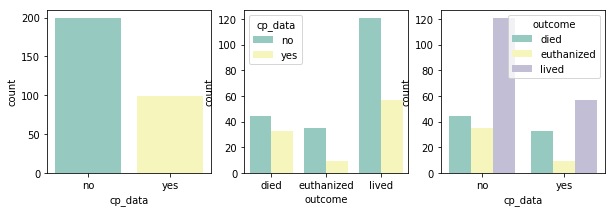

In [59]:
cat_plot("cp_data")

outcome(결과)
  - what eventually happened to the horse?
  - possible values:
    - 1 = lived
    - 2 = died
    - 3 = was euthanized

In [60]:
df['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

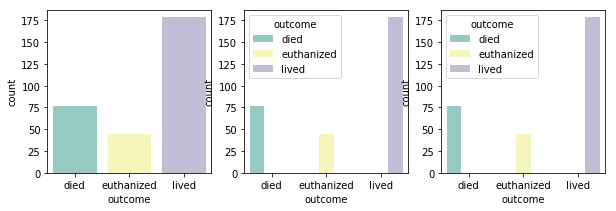

In [61]:
cat_plot("outcome")

In [62]:
from scipy.stats import chisquare
from IPython.display import display

In [63]:
# for cat in cate:
#     statistic, p = chisquare(df[cat].apply(str).value_counts())
#     chisq = {"statistic" : statistic, "p-value" : p.round(2)}
#     print(cat)
#     display(pd.DataFrame(index=["Chi Square"], data=chisq)[["statistic","p-value"]])

In [64]:
# cate_str = 'outcome ~ C(surgery) + C(age) + C(temp_of_extremities) + C(peripheral_pulse) + C(mucous_membrane) + C(capillary_refill_time) + C(pain) + C(peristalsis) + C(abdominal_distention) + C(nasogastric_tube) + C(nasogastric_reflux) + C(rectal_exam_feces) + C(abdomen) + C(abdomo_appearance) + C(surgical_lesion) + C(cp_data)'

In [65]:
# model = sm.OLS.from_formula(cate_str+'-1', data=df)
# result = model.fit()
# sm.stats.anova_lm(result, typ=2)

Missing values: 30% of the values are missing

## Missing value

In [66]:
df['rectal_temp'].fillna(value=df['rectal_temp'].mode()[0], inplace=True)
df['pulse'].fillna(value=df['pulse'].mean(), inplace=True)
df['respiratory_rate'].fillna(value=df['respiratory_rate'].mean(), inplace=True)
df['temp_of_extremities'].fillna(value=df['temp_of_extremities'].mode()[0], inplace=True)
df['peripheral_pulse'].fillna(value=df['peripheral_pulse'].mode()[0], inplace=True)
df['mucous_membrane'].fillna(value=df['mucous_membrane'].mode()[0], inplace=True)
df['capillary_refill_time'].fillna(value=df['capillary_refill_time'].mode()[0], inplace=True)
df['pain'].fillna(value=df['pain'].mode()[0], inplace=True)
df['peristalsis'].fillna(value=df['peristalsis'].mode()[0], inplace=True)
df['abdominal_distention'].fillna(value=df['abdominal_distention'].mode()[0], inplace=True)
df['nasogastric_tube'].fillna(value=df['nasogastric_tube'].mode()[0], inplace=True)
df['nasogastric_reflux'].fillna(value=df['nasogastric_reflux'].mode()[0], inplace=True)
df['nasogastric_reflux_ph'].fillna(value=df['nasogastric_reflux_ph'].mean(), inplace=True)
df['rectal_exam_feces'].fillna(value=df['rectal_exam_feces'].mode()[0], inplace=True)
df['abdomen'].fillna(value=df['abdomen'].mode()[0], inplace=True)
df['packed_cell_volume'].fillna(value=df['packed_cell_volume'].mean(), inplace=True)
df['total_protein'].fillna(value=df.total_protein.mode().sum()/len(df.total_protein.mode()), inplace=True)
df['abdomo_appearance'].fillna(value=df['abdomo_appearance'].mode()[0], inplace=True)
df['abdomo_protein'].fillna(value=df['abdomo_protein'].mode()[0], inplace=True)

### Missing value 처리후 그래프

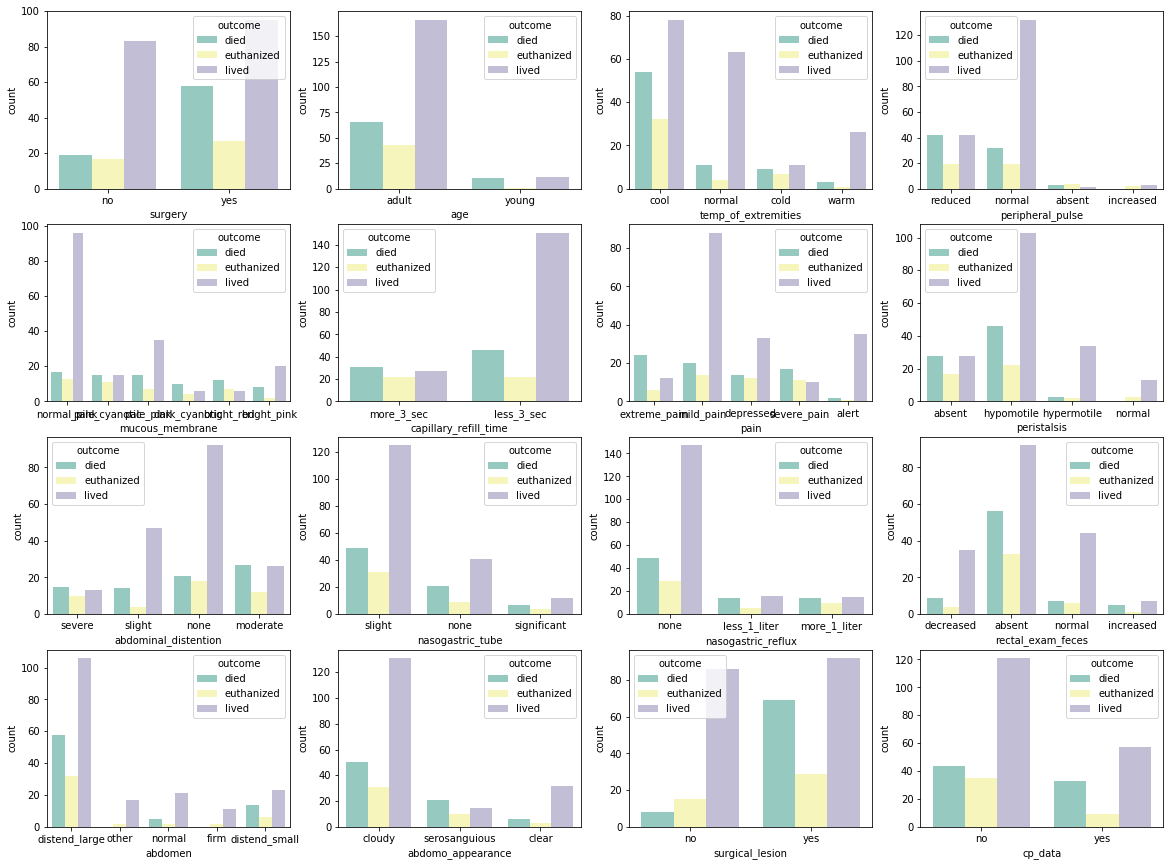

In [67]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(cate):
    plt.subplot(4,4,i+1)
    sns.countplot(feature, hue='outcome', data=df, palette="Set3")
plt.show()

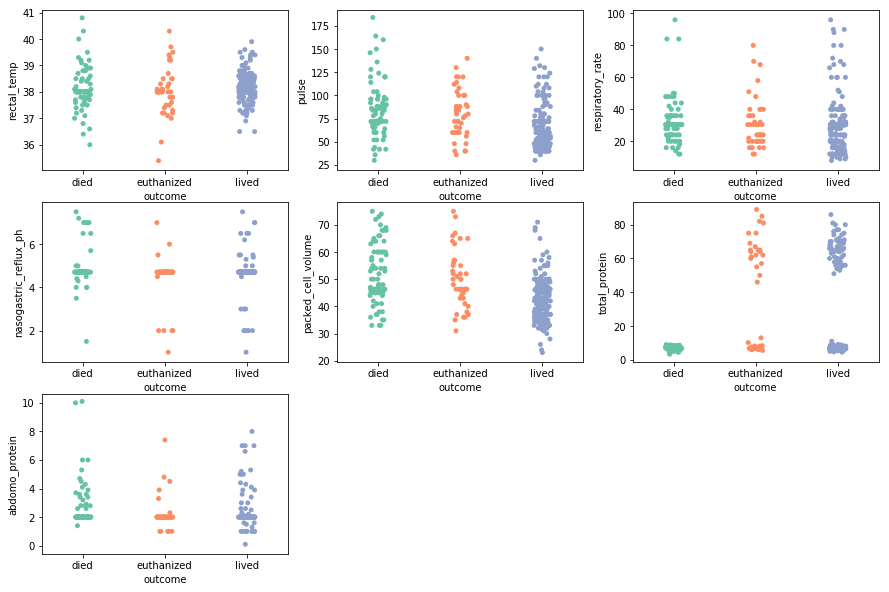

In [68]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric):
    plt.subplot(3,3,i+1)
    sns.stripplot("outcome", feature, data=df, jitter=True, palette="Set2")
plt.show()

## Feature selection

## Modeling

In [69]:
df['surgery'].replace({'yes': 1, 'no': 2}, inplace=True)
df['age'].replace({'adult': 1, 'young': 2}, inplace=True)
df['temp_of_extremities'].replace({'normal': 1, 'warm': 2, 'cool': 3, 'cold': 4}, inplace=True)
df['peripheral_pulse'].replace({'normal': 1, 'increased': 2, 'reduced': 3, 'absent': 4}, inplace=True)
df['mucous_membrane'].replace({'normal_pink': 1, 'bright_pink': 2, 'pale_pink': 3, 'pale_cyanotic': 4, 'bright_red': 5, 'dark_cyanotic': 6}, inplace=True)
df['capillary_refill_time'].replace({'less_3_sec': 1, 'more_3_sec': 2, '3': 2}, inplace=True)
df['pain'].replace({'alert': 1, 'depressed': 2, 'mild_pain': 3, 'severe_pain': 4, 'extreme_pain': 5}, inplace=True)
df['peristalsis'].replace({'hypermotile': 1, 'normal': 2, 'hypomotile': 3, 'absent': 4}, inplace=True)
df['abdominal_distention'].replace({'none': 1, 'slight': 2, 'moderate': 3, 'severe': 4}, inplace=True)
df['nasogastric_tube'].replace({'none': 1, 'slight': 2, 'significant': 3}, inplace=True)
df['nasogastric_reflux'].replace({'none': 1, 'more_1_liter': 2, 'less_1_liter': 3}, inplace=True)
df['rectal_exam_feces'].replace({'normal': 1, 'increased': 2, 'decreased': 3, 'absent': 4}, inplace=True)
df['abdomen'].replace({'normal': 1, 'other': 2, 'firm': 3, 'distend_small': 4, 'distend_large': 5}, inplace=True)
df['abdomo_appearance'].replace({'clear': 1, 'cloudy': 2, 'serosanguious': 3}, inplace=True)
df['surgical_lesion'].replace({'yes': 1, 'no': 2}, inplace=True)
df['cp_data'].replace({'yes': 1, 'no': 2}, inplace=True)
df['outcome'].replace({'lived': 1, 'died': 2, 'euthanized':3}, inplace=True)

In [70]:
numeric2 = ['rectal_temp', 'pulse', 'packed_cell_volume', 'total_protein', 'outcome']

cate3 = ['surgery', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
        'capillary_refill_time', 'pain', 'abdominal_distention']

feat2 = cate3 + numeric2

In [189]:
dfX = df[feat2].drop('outcome', axis=1)
dfy = df[feat2]['outcome']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.20, random_state=10)

## Model selection

In [202]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          1       0.87      0.95      0.91        43
          2       0.55      0.67      0.60         9
          3       1.00      0.25      0.40         8

avg / total       0.84      0.82      0.80        60



In [72]:
algo = {'OVR':OneVsRestClassifier(LogisticRegression()),
        'OVO':OneVsOneClassifier(LogisticRegression()),
        'LR':LogisticRegression(),
        'DT':DecisionTreeClassifier(),
        'RFC':RandomForestClassifier(n_estimators=100),
        'SVM':SVC(gamma=0.001),
        'KNN':KNeighborsClassifier(n_neighbors=10)}

In [73]:
for k, v in algo.items():
    model = v
    model.fit(X_train, y_train)
    print('Acurracy of ' + k + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))

Acurracy of OVR is 78.33
Acurracy of OVO is 76.67
Acurracy of LR is 78.33
Acurracy of DT is 63.33
Acurracy of RFC is 80.00
Acurracy of SVM is 81.67
Acurracy of KNN is 80.00


In [75]:
model = RandomForestClassifier(n_estimators=30, random_state=None)
model.fit(X_train, y_train)
print('Acurracy of ' + 'RFC' + ' is {0:.2f}'.format(model.score(X_test, y_test)*100))

Acurracy of RFC is 81.67


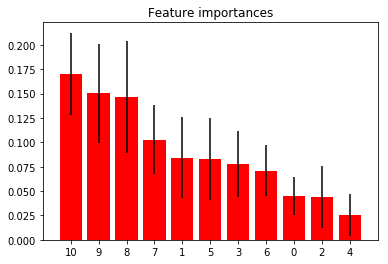

In [203]:
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [205]:
imp_dict = dict()
for i, j in zip(X_train.columns, importances):
    imp_dict[i] = j

In [206]:
import operator
sorted_x = sorted(imp_dict.items(), key=operator.itemgetter(1))
sorted_x

[('capillary_refill_time', 0.025682199870156047),
 ('peripheral_pulse', 0.043939552710156163),
 ('surgery', 0.04519304471489799),
 ('abdominal_distention', 0.0709568063218248),
 ('mucous_membrane', 0.077525967461662168),
 ('pain', 0.083124406551578101),
 ('temp_of_extremities', 0.084068680041515215),
 ('rectal_temp', 0.10273282201330222),
 ('pulse', 0.14639812311761405),
 ('packed_cell_volume', 0.15027090752273814),
 ('total_protein', 0.17010748967455516)]

# test

In [207]:
df_test = pd.read_csv('horse-colic.test.csv')

In [208]:
df_test.replace({'?': None}, inplace=True)
df_test['surgery'].fillna(value=df['surgery'].mode()[0], inplace=True)
df_test['rectal_temp'].fillna(value=df['rectal_temp'].mode()[0], inplace=True)
df_test['pulse'].fillna(value=df['pulse'].mean(), inplace=True)
df_test['respiratory_rate'].fillna(value=df['respiratory_rate'].mean(), inplace=True)
df_test['temp_of_extremities'].fillna(value=df['temp_of_extremities'].mode()[0], inplace=True)
df_test['peripheral_pulse'].fillna(value=df['peripheral_pulse'].mode()[0], inplace=True)
df_test['mucous_membrane'].fillna(value=df['mucous_membrane'].mode()[0], inplace=True)
df_test['capillary_refill_time'].fillna(value=df['capillary_refill_time'].mode()[0], inplace=True)
df_test['pain'].fillna(value=df['pain'].mode()[0], inplace=True)
df_test['peristalsis'].fillna(value=df['peristalsis'].mode()[0], inplace=True)
df_test['abdominal_distention'].fillna(value=df['abdominal_distention'].mode()[0], inplace=True)
df_test['nasogastric_tube'].fillna(value=df['nasogastric_tube'].mode()[0], inplace=True)
df_test['nasogastric_reflux'].fillna(value=df['nasogastric_reflux'].mode()[0], inplace=True)
df_test['nasogastric_reflux_ph'].fillna(value=df['nasogastric_reflux_ph'].mean(), inplace=True)
df_test['rectal_exam_feces'].fillna(value=df['rectal_exam_feces'].mode()[0], inplace=True)
df_test['abdomen'].fillna(value=df['abdomen'].mode()[0], inplace=True)
df_test['packed_cell_volume'].fillna(value=df['packed_cell_volume'].mean(), inplace=True)
df_test['total_protein'].fillna(value=df.total_protein.mode().sum()/len(df.total_protein.mode()), inplace=True)
df_test['abdomo_appearance'].fillna(value=df['abdomo_appearance'].mode()[0], inplace=True)
df_test['abdomo_protein'].fillna(value=df['abdomo_protein'].mode()[0], inplace=True)
df_test.dropna(inplace=True)

In [209]:
df_test = df_test[feat2]

In [210]:
df_testX = df_test.drop('outcome', axis=1)
df_testy = df_test['outcome'].astype(int)

In [211]:
model = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=None)
model.fit(dfX, dfy)

print(classification_report(df_testy, model.predict(df_testX)))

             precision    recall  f1-score   support

          1       0.82      0.89      0.86        47
          2       0.57      0.67      0.62        12
          3       1.00      0.25      0.40         8

avg / total       0.80      0.78      0.76        67



In [212]:
import tensorflow as tf

In [213]:
dfXX = dfX.as_matrix()
dfyy = pd.get_dummies(dfy).as_matrix()
dfyy.shape, dfXX.shape

((299, 3), (299, 11))

In [214]:
dfyy[0]

array([0, 1, 0], dtype=uint8)

In [96]:
learning_rate=0.01

# input place holders
X = tf.placeholder(tf.float32, [None, dfXX.shape[1]])
Y = tf.placeholder(tf.float32, [None, 3])
nb_classes = 3

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([dfXX.shape[1], nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

hypothesis = tf.matmul(X, W) + b

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
# hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
# optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: dfXX, Y: dfyy})
        if step % 400 == 0:
            print(step, sess.run(cost, feed_dict={X: dfXX, Y: dfyy}))
    for i in range(10):
        print('--------------')

        # Testing & One-hot encoding
        a = sess.run(hypothesis, feed_dict={X: [list(dfXX[i])]})
        print(a, sess.run(tf.argmax(a, 1)), dfyy[i])

0 364.151
400 106.297
800 79.159
1200 64.2512
1600 48.9881
2000 140.999
--------------
[[ 217.6995697   252.58195496 -446.08081055]] [1] [0 1 0]
--------------
[[ 912.27575684 -792.41259766   37.84806824]] [0] [0 0 1]
--------------
[[ 340.73126221   82.07112122 -418.49588013]] [0] [1 0 0]
--------------
[[ 235.49479675  601.17126465 -694.99755859]] [1] [0 1 0]
--------------
[[  28.50393867  519.25213623 -566.43511963]] [1] [0 1 0]
--------------
[[ 255.69683838  258.40914917 -501.74133301]] [1] [1 0 0]
--------------
[[ 312.54916382  139.85406494 -445.61712646]] [0] [1 0 0]
--------------
[[ 266.24813843  196.60487366 -459.24728394]] [0] [0 1 0]
--------------
[[ 236.41648865  299.87612915 -476.41937256]] [1] [0 0 1]
--------------
[[ 305.0161438   310.54403687 -558.4284668 ]] [1] [1 0 0]


In [98]:
# input place holders
X = tf.placeholder(tf.float32, [None, dfXX.shape[1]])
Y = tf.placeholder(tf.float32, [None, 3])
nb_classes = 3

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([dfXX.shape[1], nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)



# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: dfXX, Y: dfyy})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: dfXX, Y: dfyy}))

    for i in range(10):
        print('--------------')

        # Testing & One-hot encoding
        a = sess.run(hypothesis, feed_dict={X: [list(dfXX[i])]})
        print(a, sess.run(tf.argmax(a, 1)), dfyy[i])

0 1.23333
200 1.22894
400 1.2285
600 1.22841
800 1.22835
1000 1.22833
1200 1.22831
1400 1.2283
1600 1.22828
1800 1.22827
2000 1.22827
--------------
[[  0.00000000e+00   1.00000000e+00   2.05063770e-08]] [1] [0 1 0]
--------------
[[ 0.  0.  1.]] [2] [0 0 1]
--------------
[[  0.00000000e+00   1.00000000e+00   6.82223514e-11]] [1] [1 0 0]
--------------
[[ 0.          0.99879932  0.00120061]] [1] [0 1 0]
--------------
[[  0.00000000e+00   1.00000000e+00   1.65472004e-37]] [1] [0 1 0]
--------------
[[  0.00000000e+00   1.00000000e+00   2.14134892e-16]] [1] [1 0 0]
--------------
[[  0.00000000e+00   1.00000000e+00   4.18265784e-14]] [1] [1 0 0]
--------------
[[  0.00000000e+00   1.00000000e+00   1.02163733e-18]] [1] [0 1 0]
--------------
[[ 0.          0.00912136  0.99087864]] [2] [0 0 1]
--------------
[[  0.00000000e+00   9.99999881e-01   6.49200089e-08]] [1] [1 0 0]


In [100]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, dfXX.shape[1]])
Y = tf.placeholder(tf.float32, [None, 3])
nb_classes = 3

# weights & bias for nn layers
W = tf.Variable(tf.random_normal([dfXX.shape[1], nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: dfXX, Y: dfyy})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: dfXX, Y: dfyy}))

    for i in range(10):
        print('--------------')

        # Testing & One-hot encoding
        a = sess.run(hypothesis, feed_dict={X: [list(dfXX[i])]})
        print(a, sess.run(tf.argmax(a, 1)), dfyy[i])

0 1.13519
200 0.964126
400 0.960519
600 0.958257
800 0.956186
1000 0.953938
1200 0.951174
1400 0.948467
1600 0.944649
1800 0.943022
2000 0.942154
--------------
[[  9.97457325e-01   2.54273368e-03   8.54490429e-14]] [0] [0 1 0]
--------------
[[ 1.  0.  0.]] [0] [0 0 1]
--------------
[[  9.99964476e-01   2.97447599e-07   3.52509305e-05]] [0] [1 0 0]
--------------
[[  1.18131641e-06   9.99998808e-01   2.68772633e-38]] [1] [0 1 0]
--------------
[[  1.00000000e+00   4.75732865e-12   4.59251503e-18]] [0] [0 1 0]
--------------
[[  9.99995828e-01   4.12567260e-06   5.32210018e-13]] [0] [1 0 0]
--------------
[[  9.99993443e-01   6.59372108e-06   2.13187856e-10]] [0] [1 0 0]
--------------
[[  9.99999762e-01   1.90385876e-07   1.14215050e-12]] [0] [0 1 0]
--------------
[[  1.39149919e-03   9.98608530e-01   2.73349285e-16]] [1] [0 0 1]
--------------
[[  1.27105732e-05   9.99987245e-01   3.43877758e-18]] [1] [1 0 0]


In [ ]:
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [ ]:
# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3

In [103]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
nb_classes = 3
X = tf.placeholder(tf.float32, [None, dfXX.shape[1]])
Y = tf.placeholder(tf.float32, [None, nb_classes])

# weights & bias for nn layers
W1 = tf.Variable(tf.random_normal([dfXX.shape[1], 16]))
b1 = tf.Variable(tf.random_normal(16))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([16, 16]))
b2 = tf.Variable(tf.random_normal([16]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.Variable(tf.random_normal([16, nb_classes]))
b3 = tf.Variable(tf.random_normal([nb_classes]))
hypothesis = tf.matmul(L2, W3) + b3

# hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: dfXX, Y: dfyy})
        if step % 200 == 0:
            print(step, sess.run(cost, feed_dict={X: dfXX, Y: dfyy}))

    for i in range(10):
        print('--------------')

        # Testing & One-hot encoding
        a = sess.run(hypothesis, feed_dict={X: [list(dfXX[i])]})
        print(a, sess.run(tf.argmax(a, 1)), dfyy[i])

ValueError: Shape must be rank 1 but is rank 0 for 'random_normal_27/RandomStandardNormal' (op: 'RandomStandardNormal') with input shapes: [].